# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [16]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
total_fruits = 100
apples = 60
oranges = 40

prob_apples = apples/total_fruits
apple_percent = prob_apples * 100

prob_oranges = oranges/total_fruits
orange_percent = prob_oranges * 100

print(f"The probability that the fruit is an apple is {round(prob_apples,2)} or {apple_percent}%. The probability that the fruit is an orange is {round(prob_oranges,2)} or {round(orange_percent)}%.")

The probability that the fruit is an apple is 0.6 or 60.0%. The probability that the fruit is an orange is 0.4 or 40%.


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [26]:
# What is the probability that the first 5 fruits are all apples?
prob_5_apples = prob_apples ** 5
prob_5_apples_percent = prob_5_apples * 100

prob_5_apples_15_oranges = (prob_apples ** 5) * (prob_oranges ** 5)
prob_5_apples_15_oranges_percent = prob_5_apples_15_oranges * 100

print(f"The probability that the first 5 fruits are all apples: {round(prob_5_apples, 3)} or {round(prob_5_apples_percent,1)}%")
print(f"The probability that the first 5 fruits are all apples and the next 15 fruits are all oranges: {round(prob_5_apples_15_oranges, 3)} or {round(prob_5_apples_15_oranges_percent, 1)}%")

The probability that the first 5 fruits are all apples: 0.078 or 7.8%
The probability that the first 5 fruits are all apples and the next 15 fruits are all oranges: 0.001 or 0.1%


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [50]:
# your solution here
import random 

sample_size = 20 

sample = random.choices(['apple', 'orange'], weights=[prob_apples, prob_oranges], k=sample_size)

num_apples = sample.count('apple')
num_oranges = sample.count('orange')

# Output the sampled fruits and their count
print(f"Sampled fruits: {sample}")
print(f"Number of apples: {num_apples}")
print(f"Number of oranges: {num_oranges}")

binomial_coeff = math.comb(sample_size, 5)

# Calculate the probability for 5 apples and 15 oranges
prob_5_apples_15_oranges = binomial_coeff * (prob_apples ** 5) * (prob_oranges ** (sample_size - 5))

print(f"The probability of getting 5 apples and 15 oranges (in any order) is {round(prob_5_apples_15_oranges,6)}")

Sampled fruits: ['apple', 'apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'apple', 'apple', 'orange', 'orange', 'orange', 'apple', 'apple', 'orange', 'orange', 'apple']
Number of apples: 9
Number of oranges: 11
The probability of getting 5 apples and 15 oranges (in any order) is 0.001294


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [52]:
# your code here
prob_less_than_5_apples = stats.binom.cdf(4, sample_size, prob_apples)

# Output the result
print(f"The probability that less than 5 fruits picked are apples is {round(prob_less_than_5_apples, 6)}")

The probability that less than 5 fruits picked are apples is 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

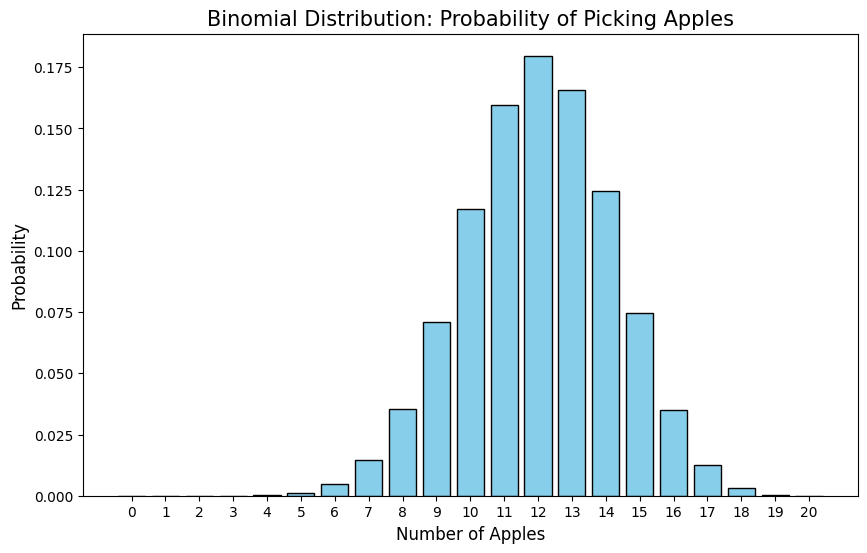

In [54]:
# your code here
# Please label the axes and give a title to the plot 

# Generate the range of x (from 0 to sample_size)
x = np.arange(0, sample_size + 1)

# Compute the binomial probability mass function (PMF) for each x
pmf_values = stats.binom.pmf(x, sample_size, prob_apples)

# Plot the PDF (PMF)
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title("Binomial Distribution: Probability of Picking Apples", fontsize=15)
plt.xlabel("Number of Apples", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks(x)  # Show x-ticks for each number of apples (0 to 20)

# Show the plot
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [59]:
# your code here 
lambda_goals = 2.3  # Average number of goals per match
k_goals = 5         # Number of goals we want to calculate the probability for

# Calculate the Poisson probability using the formula
poisson_prob = (math.pow(lambda_goals, k_goals) * math.exp(-lambda_goals)) / math.factorial(k_goals)

# Display the result
print(f"The probability of scoring exactly {k_goals} goals in a match is: {poisson_prob:.6f}")

The probability of scoring exactly 5 goals in a match is: 0.053775


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

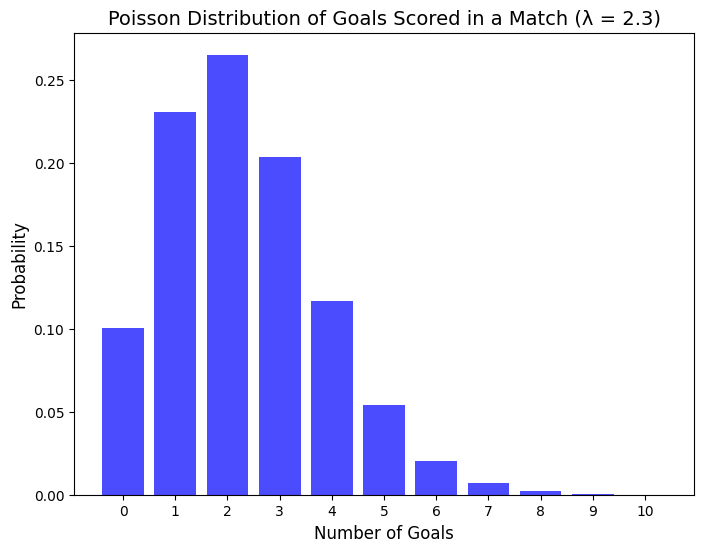

In [65]:
# your code here
# Please label the axes and give a title to the plot 

# Create a range of goal values (0 to 10)
x_values = np.arange(0, 11)

poisson_probs = [(math.pow(lambda_goals, x) * math.exp(-lambda_goals)) / math.factorial(x) for x in x_values]

# Plot the Poisson distribution
plt.figure(figsize=(8, 6))
plt.bar(x_values, poisson_probs, color='blue', alpha=0.7)

# Add labels and title
plt.title('Poisson Distribution of Goals Scored in a Match (λ = 2.3)', fontsize=14)
plt.xlabel('Number of Goals', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Display the plot
plt.xticks(x_values)
plt.show()